ML@Cezeaux


### Machine Learning Tutorial

# Supervised Learning: regression
by [Emille Ishida](https://www.emilleishida.com/)

### *Take home message 3: choosing a machine learning algorithm is an art!*

**Goal:** Get acquainted with basic machine learning algorithms for regression

**Task**: Estimate the redshift based on photometric magnitudes  

**Data**: Extract from the [Teddy photometric redshift catalog](https://github.com/COINtoolbox/photoz_catalogues)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;First presented by [Beck et al., 2017, MNRAS, 468 (4323)](https://cosmostatistics-initiative.org/portfolio-item/representativeness-photoz/)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5000 objects for training (teddy_A)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5000 objects for testing (teddy_B)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Features:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$mag\_r$: standardized r-band magnitude  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$u-g$: standardized SDSS u-g color  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$g-r$: standardized SDSS g-r color  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$r-i$: standardized SDSS r-i color  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$i-z$: standardized SDSS i-z color  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$z\_spec$: spectroscopic redshift (label)  

In [1]:
# import some basic libaries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

### Step 1: Digest the data

As always, we start by loading and visualizing the data 

In [2]:
# read the data
data = pd.read_csv('../../data/teddy_A.csv')

# check available columns (features)
data.keys()

Index(['mag_r', 'u-g', 'g-r', 'r-i', 'i-z', 'z_spec'], dtype='object')

In [3]:
# check dimensionality of the data
data.shape

(5000, 6)

We see from the documentation that the test data is given in a separate file.  
As a consequence, we only need to split the training data intro train and validation.

In [4]:
# separate 80% for training and 20% for testing
X_train, X_validation, y_train, y_validation = \
train_test_split(data[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']], data['z_spec'], test_size=0.2, random_state=1)

# check your samples (size, features, etc.)
print('training sample:    ', X_train.shape, y_train.shape) 
print('validation sample:  ', X_validation.shape, y_validation.shape)

training sample:     (4000, 5) (4000,)
validation sample:   (1000, 5) (1000,)


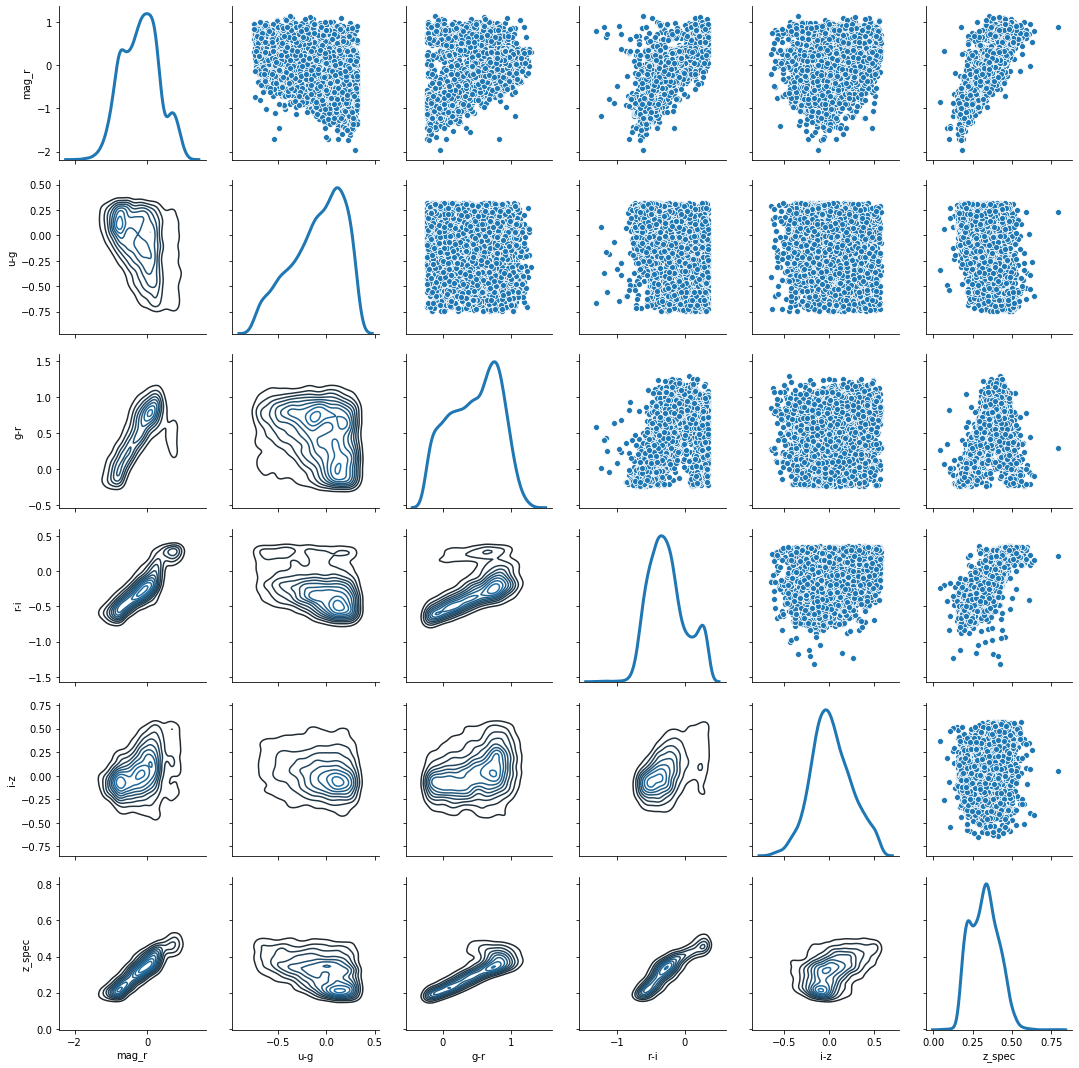

In [5]:
# plot the data
g = sns.PairGrid(data, diag_sharey=False)
g.map_lower(sns.kdeplot)                      
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

### Step 2: train a few algorithms

Using [scikit-learn](https://scikit-learn.org/stable/) we are able to quickly train a set of algorithms: 


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.a) [Linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html):

In [6]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# train
regr.fit(X_train, y_train)

# estimate the photoz
photoz_linear_val = regr.predict(X_validation)

# quality of the fit
R2_linear_val = regr.score(X_validation, y_validation)
R2_linear_val

0.8171473907261236

Cross-Validation

In [22]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
regr_cv = linear_model.LinearRegression()

#train model with cv of 5 
cv_scores = cross_val_score(regr_cv, X_train, y_train, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.83538979 0.81395956 0.82385531 0.8469261  0.83514917]
cv_scores mean:0.8310559852373111


There is not much more to optimize in this simple model, so we can use the trained algorithm to estimate the redshift in the test sample:

In [23]:
# read  test sample
data_test = pd.read_csv('../../data/teddy_B.csv')

# check the features
data_test.keys()

Index(['mag_r', 'u-g', 'g-r', 'r-i', 'i-z', 'z_spec'], dtype='object')

In [24]:
# estimate the photoz
photoz_linear_test = regr.predict(data_test[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']])

# quality of the fit
R2_linear_test = regr.score(data_test[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']], data_test[['z_spec']])
R2_linear_test

0.8086652420908533

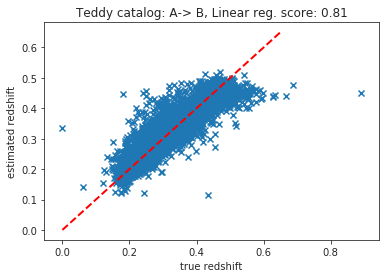

In [25]:
# plot result
sns.set_style('ticks')
fig = plt.figure()
plt.title('Teddy catalog: A-> B, Linear reg. score: ' + str(round(R2_linear_test,2)))
plt.scatter(data_test[['z_spec']], photoz_linear_test, marker='x')
plt.plot([0,0.65], [0,0.65], color='red', lw=2, ls='--')
plt.xlabel('true redshift')
plt.ylabel('estimated redshift')
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.b) [Nearest Neighbor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html):

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Here we have a little more room for improvement.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Try changing the number of neighbors, or other parameters (check documentation), to improve the quality of the fit. 

In [10]:
from sklearn.neighbors import KNeighborsRegressor

# choose number of neighbors
nn = 9

# initiate a KNN instance
knn = KNeighborsRegressor(n_neighbors=nn)

# fit the model using training data
knn.fit(X_train, y_train)

# estimate photometric redshift for the validation data
photoz_knn_validation = knn.predict(X_validation)

# quality of the fit
R2_knn_val = knn.score(X_validation, y_validation)
R2_knn_val

0.8471992477625828

Search for the best value of number of neighbors

In [20]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsRegressor()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 200)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 33}

Once you are happy with the optimization, estimate the photometric redshift values for the test sample:

In [26]:
# initiate a KNN instance
knn3 = KNeighborsRegressor(n_neighbors=33)

# fit the model using training data
knn3.fit(X_train, y_train)


# estimate the photoz
photoz_knn_test = knn3.predict(data_test[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']])

# quality of the fit
R2_knn_test = knn3.score(data_test[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']], data_test[['z_spec']])
R2_knn_test

0.8423049184197526

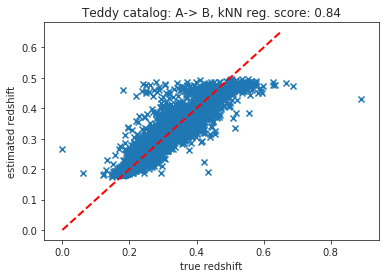

In [27]:
# plot result
sns.set_style('ticks')
fig = plt.figure()
plt.title('Teddy catalog: A-> B, kNN reg. score: ' + str(round(R2_knn_test,2)))
plt.scatter(data_test[['z_spec']], photoz_knn_test, marker='x')
plt.plot([0,0.65], [0,0.65], color='red', lw=2, ls='--')
plt.xlabel('true redshift')
plt.ylabel('estimated redshift')
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.c) [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html):

Here we have still more freedom. Start by optimizing the number of trees and maximum depth.


In [ ]:
from sklearn.ensemble import RandomForestRegressor


#create new a knn model
randforest = RandomForestRegressor()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_estimators': np.arange(50, 150), 'max_depth': np.arange(1,30)}

#use gridsearch to test all values for n_neighbors
rf_gscv = GridSearchCV(randforest, param_grid, cv=5)

#fit model to data
rf_gscv.fit(X_train, y_train)

#check top performing n_neighbors value
rf_gscv.best_params_


In [28]:

# choose number of trees in the forest
n_trees = 100

# define maximum depth, None=> split continues until the leafs are pure
depth = 8

# initiate a Random Forest instance
randforest = RandomForestRegressor(max_depth=depth, n_estimators=n_trees)

# train the model
randforest.fit(X_train, y_train)

# estimate the photometric redshift for the validation sample
photoz_randforest_validation = randforest.predict(X_validation)

# quality of the fit
R2_randforest_val = randforest.score(X_validation, y_validation)
R2_randforest_val

0.8578973689073496

If you are satisfied, see how your regression perform in the test sample:

In [14]:
# estimate the photoz
photoz_randforest_test = randforest.predict(data_test[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']])

# quality of the fit
R2_randforest_test = randforest.score(data_test[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']], data_test[['z_spec']])
R2_randforest_test

0.8409440540015392

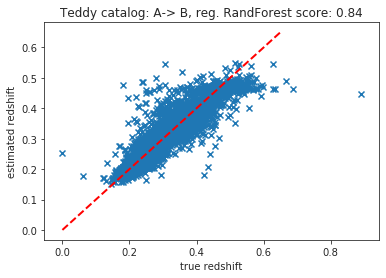

In [15]:
# plot result
sns.set_style('ticks')
fig = plt.figure()
plt.title('Teddy catalog: A-> B, reg. RandForest score: ' + str(round(R2_randforest_test,2)))
plt.scatter(data_test[['z_spec']], photoz_randforest_test, marker='x')
plt.plot([0,0.65], [0,0.65], color='red', lw=2, ls='--')
plt.xlabel('true redshift')
plt.ylabel('estimated redshift') 
plt.show()

#### ... few free to try other algorithms if you wish to

### Step 3: Compare results

Let's take a look at the results we have so far:

In [16]:

print('                         Test sample   Validation sample')
print('Linear regression: ', R2_linear_test, R2_linear_val)
print('kNN:               ', R2_knn_test, R2_knn_val)
print('Random Forest:     ', R2_randforest_test, R2_randforest_val)

                         Test sample   Validation sample
Linear regression:  0.8086652420908533 0.8171473907261236
kNN:                0.8395832000152723 0.8471992477625828
Random Forest:      0.8409440540015392 0.858998705543802


These results seem pretty stable, which give us still another ensurance that the results from the machine learning algorithms are consistent.

**Can you guess what characteristics of the data helps this stability?**

Answer: This expected if data quality is consistent and there is representativeness between training and test samples. Which happens in this case:

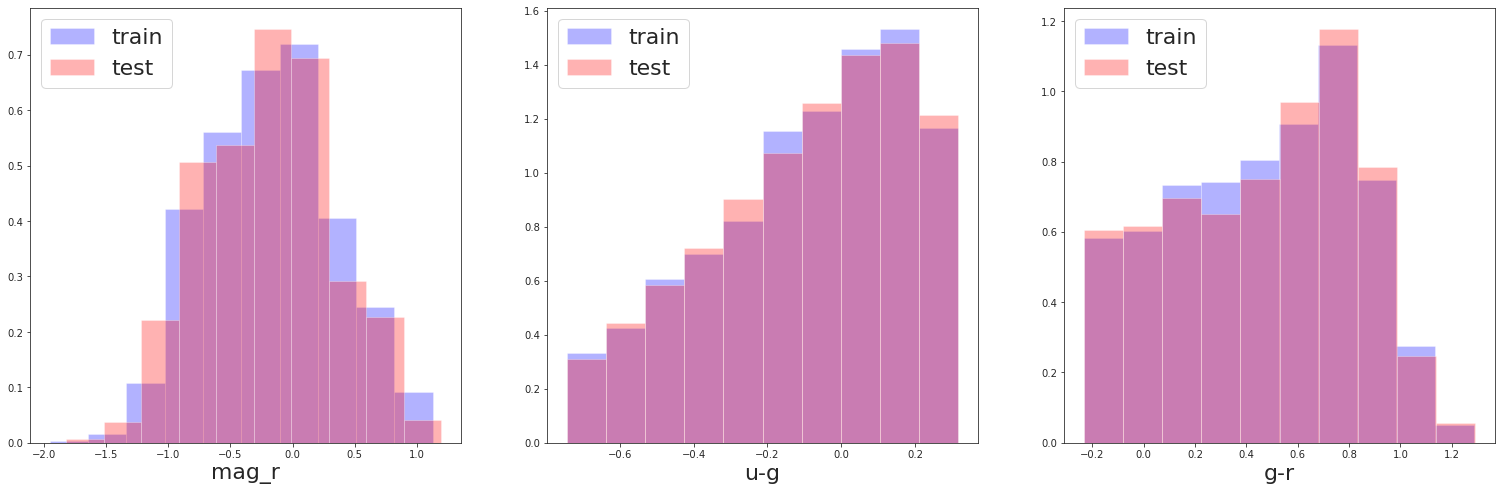

In [17]:
fig = plt.figure(figsize=(8.75*3, 8))

plt.subplot(1,3,1)
plt.hist(X_train['mag_r'], color='blue', alpha=0.3, label='train', density=True)
plt.hist(data_test['mag_r'], color='red', alpha=0.3, label='test', density=True)
plt.legend(fontsize=22)
plt.xlabel('mag_r', fontsize=22)

plt.subplot(1,3,2)
plt.hist(X_train['u-g'], color='blue', alpha=0.3, label='train', density=True)
plt.hist(data_test['u-g'], color='red', alpha=0.3, label='test', density=True)
plt.legend(fontsize=22)
plt.xlabel('u-g', fontsize=22)

plt.subplot(1,3,3)
plt.hist(X_train['g-r'], color='blue', alpha=0.3, label='train', density=True)
plt.hist(data_test['g-r'], color='red', alpha=0.3, label='test', density=True)
plt.legend(fontsize=22)
plt.xlabel('g-r', fontsize=22)
plt.show()

### Food for thought:

In the `data` folder of the github repository there are other 2 files: `teddy_C` and `teddy_D`.   
This files should be used only for testing.  

Try applying your trained regression models in these data sets and compare the results with the ones above. 

As always, remember to weight your expectations before you start.

**Are the results any different? If so, can you guess why?**